In [53]:
#import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score

In [12]:
def import_multiple_csv(files):

    dfs = []
    
    # Iterate over each file in the list
    for file in files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
        # Append the DataFrame to the list
        dfs.append(df)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df = pd.concat(dfs, ignore_index=True)
    
    return df


In [13]:
#import csv files
#ask ali for help creating a function that reads multiple dataframes into a script at once
file_paths = [
            'noaa_csv\StormEvents_details-ftp_v1.0_d2000_c20220425.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2002_c20220425.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2004_c20220425.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2006_c20220425.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2008_c20220425.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2010_c20220425.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2012_c20221216.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2014_c20231116.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2016_c20220719.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2018_c20230616.csv',
            'noaa_csv\StormEvents_details-ftp_v1.0_d2020_c20240418.csv',
             ]  # List of file paths
rough_total_df = import_multiple_csv(file_paths)
rough_total_df.shape
# date = 200201
# selected_rows = rough_total_df[rough_total_df['BEGIN_YEARMONTH'] >= date]
# selected_rows.head()

# C:\Users\andre\AppData\Local\Temp\ipykernel_29424\2523442954.py:8: 
# DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.


C:\Users\andre\AppData\Local\Temp\ipykernel_15512\2523442954.py:8: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


(649708, 51)

In [14]:
#clean dataframes
#create function that automates the proccess
columns_to_drop = [0, 1, 2, 3, 4, 5, 9, 13, 16, 17, 18, 19, 26, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#columns_to_drop = [2]
cleaned_total_df = rough_total_df.drop(rough_total_df.columns[columns_to_drop], axis=1, inplace=False)
cleaned_total_df.columns.to_list()
#cleaned_total_df.shape
#remove non unique values from EPISODE_ID

['EPISODE_ID',
 'EVENT_ID',
 'STATE',
 'YEAR',
 'MONTH_NAME',
 'EVENT_TYPE',
 'CZ_FIPS',
 'CZ_NAME',
 'INJURIES_DIRECT',
 'INJURIES_INDIRECT',
 'DEATHS_DIRECT',
 'DEATHS_INDIRECT',
 'DAMAGE_PROPERTY',
 'DAMAGE_CROPS',
 'MAGNITUDE',
 'MAGNITUDE_TYPE',
 'FLOOD_CAUSE',
 'TOR_F_SCALE']

In [15]:
#create summary stats of DF for each year (count of weather events per year, mean damage per year)
# remove the K from
cleaned_total_df['DAMAGE_PROPERTY'] = cleaned_total_df['DAMAGE_PROPERTY'].str.replace('K', '')

# Iterate over each group (year) and generate summary statistics
summary_statistics = cleaned_total_df.groupby('YEAR')['DAMAGE_PROPERTY'].describe()
summary_statistics

,count,unique,top,freq
YEAR,,,,
2000,14677,294,0,2554
2002,15114,275,0,3847
2004,14799,354,0,2560
2006,21791,436,0.00,5691
2008,63929,494,0.00,43997
2010,52140,388,0.00,35386
2012,52581,362,0.00,37239
2014,49385,271,0.00,36786
2016,44312,309,0.00,32528


In [16]:
weather_dict = {
    
    'Marine':['High Surf', 'Rip Current', 'Seiche', 'Marine Thunderstorm Wind', 'Marine Hail', 
              'Marine High Wind', 'Marine Strong Wind', 'Astronomical Low Tide', 'Sneakerwave',
              'Marine Tropical Storm', 'Marine Dense Fog', 'Marine Hurricane/Typhoon', 
              'Marine Lightning', 'Marine Tropical Depression'],
    'Freezing':['Extreme Cold/Wind Chill', 'Winter Storm', 'Blizzard', 'Heavy Snow', 'Ice Storm',
       'Hail', 'Winter Weather', 'Frost/Freeze', 'Cold/Wind Chill', 'Avalanche', 'Sleet', 'Lake-Effect Snow'],
    'Burning':['Drought', 'Heat', 'Excessive Heat', 'Wildfire'],
    'Storms':['Thunderstorm Wind', 'High Wind', 'Lightning', 'Tornado', 'Strong Wind', 'Funnel Cloud', 'Waterspout', 'Dust Storm', 'Dust Devil',
       'Storm Surge/Tide', 'Debris Flow', 'Tropical Storm', 'Hurricane (Typhoon)', 'Tropical Depression', 'Hurricane'],
    'Floods':['Flood', 'Flash Flood', 'Coastal Flood', 'Tsunami', 'Lakeshore Flood'],
    'Particulate':['Volcanic Ash', 'Dense Smoke', 'Volcanic Ashfall'],
    'Precipitation':['Dense Fog', 'Freezing Fog', 'Heavy Rain'],

               }

In [17]:
old_event_types = []
new_event_types = []
for x in weather_dict:
    #print(weather_dict[x])
    old_event_types += weather_dict[x]
    new_event_types += [x]*len(weather_dict[x])


In [18]:
mapping_dict = dict(zip(old_event_types, new_event_types))
cleaned_total_df['EVENT_TYPE_GROUPED'] = list(map(lambda val: mapping_dict.get(val, val), cleaned_total_df['EVENT_TYPE']))
cleaned_total_df[['EVENT_TYPE', 'EVENT_TYPE_GROUPED']]

,EVENT_TYPE,EVENT_TYPE_GROUPED
0,Extreme Cold/Wind Chill,Freezing
1,Extreme Cold/Wind Chill,Freezing
2,Extreme Cold/Wind Chill,Freezing
3,Winter Storm,Freezing
4,Thunderstorm Wind,Storms
...,...,...
649703,Thunderstorm Wind,Storms
649704,Thunderstorm Wind,Storms
649705,Thunderstorm Wind,Storms
649706,Thunderstorm Wind,Storms


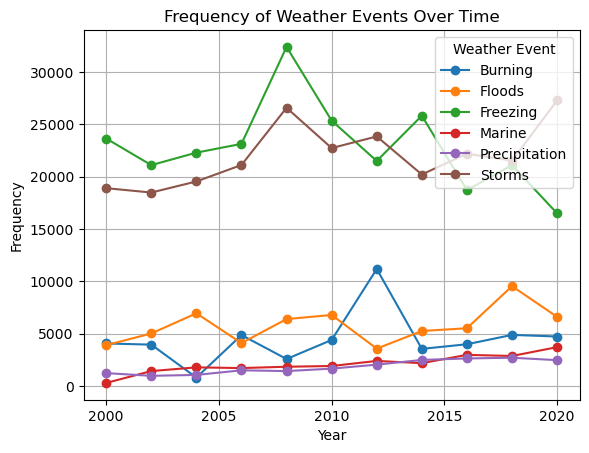

In [65]:
#analysis dataframes for trends using scatterplots, graphs etc
new_df = cleaned_total_df[cleaned_total_df['EVENT_TYPE_GROUPED'] != 'Particulate']
weather_freq_df = new_df.groupby(['YEAR', 'EVENT_TYPE_GROUPED']).size().unstack(fill_value=0)

# Plot the line graph
ax = weather_freq_df.plot(marker='o')
#count of weather events and how they change over time (line graph)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Events Over Time')
# Show the plot
plt.legend(title='Weather Event')
plt.grid(True)  # Add grid
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
plt.savefig("graph_outputs/wevents_freq1.png")
plt.show()
#maybe do one graph for freezing/storms AND one graph for the other categories that cause damage

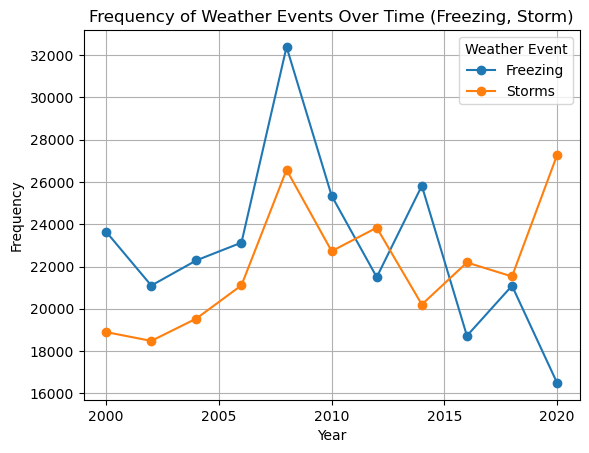

In [66]:
#analysis dataframes for trends using scatterplots, graphs etc
#determine how storms have been increasing in strength over the given time frame
storm_freezing_df = cleaned_total_df[cleaned_total_df['EVENT_TYPE_GROUPED'].isin(['Storms', 'Freezing'])]
weather_freq_df = storm_freezing_df.groupby(['YEAR', 'EVENT_TYPE_GROUPED']).size().unstack(fill_value=0)

ax = weather_freq_df.plot(marker='o')
#count of weather events and how they change over time (line graph)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Events Over Time (Freezing, Storm)')
# Show the plot
plt.legend(title='Weather Event')
plt.grid(True)  # Add grid
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
plt.savefig("graph_outputs/strm_freeze_freq2.png")
plt.show()

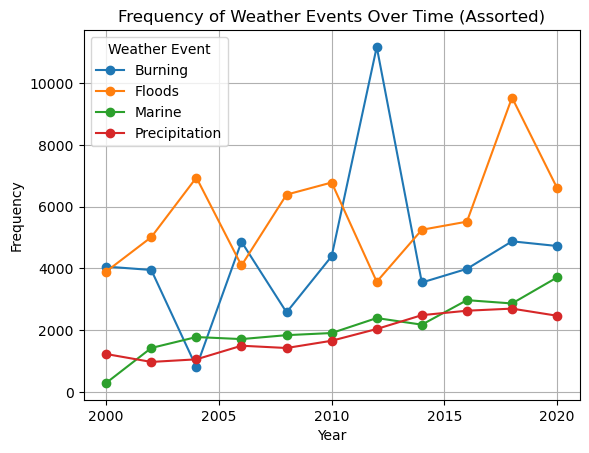

In [67]:
#analysis dataframes for trends using scatterplots, graphs etc
#determine how storms have been increasing in strength over the given time frame
storm_freezing_df = cleaned_total_df[cleaned_total_df['EVENT_TYPE_GROUPED'].isin(['Burning', 'Floods', 'Marine', 'Precipitation'])]
weather_freq_df = storm_freezing_df.groupby(['YEAR', 'EVENT_TYPE_GROUPED']).size().unstack(fill_value=0)

ax = weather_freq_df.plot(marker='o')
#count of weather events and how they change over time (line graph)
plt.xlabel('Year')
plt.ylabel('Frequency')
#r_value = weather_freq_df['YEAR'].corr(weather_freq_df['EVENT_TYPE_GROUPED'])

plt.title('Frequency of Weather Events Over Time (Assorted)')

# Show the plot
#calculate r-value

plt.legend(title='Weather Event')
plt.grid(True)  # Add grid
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
plt.savefig("graph_outputs/misc_weather_freq3.png")
plt.show()

In [98]:
#analysis dataframes for trends using scatterplots, graphs etc
#create new filtered dataframe
clean_damages_df = cleaned_total_df[['YEAR', 'DAMAGE_PROPERTY', 'STATE']]
#rough_damages_df_copy = clean_damages_df.copy()
#edit_damages_df = clean_damages_df['DAMAGE_PROPERTY'].str.replace('K', '')
clean_damages_df['DAMAGE_PROPERTY'].fillna(0, inplace=True)
#clean_damages_df['DAMAGE_PROPERTY'] = rough_damages_df_copy['DAMAGE_PROPERTY']

#final_damages_df['DAMAGE_PROPERTY'] = rough_damages_df['DAMAGE_PROPERTY'].str.replace('K', '')
#final_damages_df.fillna(0, inplace=True)

#graph of how much ($)damage weather events cause have been increasing over time (scatter plot)
# plt.scatter(x_axis, e_x)
# plt.xlabel("Years")
# plt.ylabel("Damage ($)")
# plt.title("Changes in Weather Disaster Damages ($) (2000-2020)")

# # Save the figure
# #plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.grid(True)
#plt.show()
edit_damages_df

C:\Users\andre\AppData\Local\Temp\ipykernel_15512\1952580809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_damages_df['DAMAGE_PROPERTY'].fillna(0, inplace=True)


0         NaN
1         NaN
2         NaN
3         NaN
4           2
         ... 
649703    NaN
649704    NaN
649705    NaN
649706    NaN
649707    NaN
Name: DAMAGE_PROPERTY, Length: 649708, dtype: object

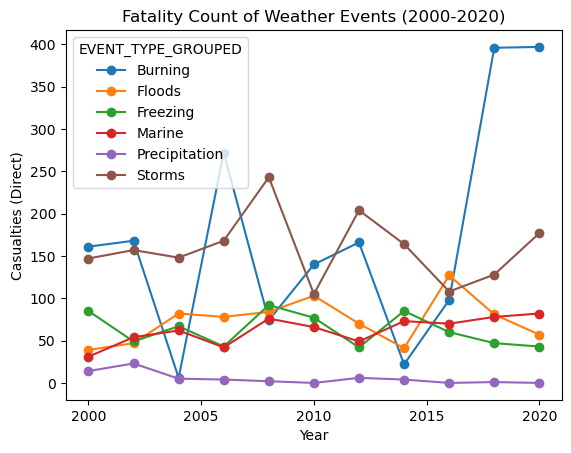

-85693.1840909091

In [68]:
#analysis dataframes for trends using scatterplots, graphs etc
#create a new dataframe identifying the top 5 most deadly weather events in each of the ten years
weather_deaths_df = cleaned_total_df[cleaned_total_df['EVENT_TYPE_GROUPED'] != 'Particulate']
weather_death_filt_df = weather_deaths_df.groupby(['YEAR', 'EVENT_TYPE_GROUPED'])['DEATHS_DIRECT'].sum().unstack(fill_value=0)#.reset_index()
#changes in number of casualties from weather events over time (line graph)
ax = weather_death_filt_df.plot(marker='o')

plt.xlabel("Year")
plt.ylabel("Casualties (Direct)")
plt.title("Fatality Count of Weather Events (2000-2020)")
ax.set_xticks([2000, 2005, 2010, 2015, 2020])

plt.savefig("graph_outputs/weather_fatalit.png")

plt.show()
r2_score(weather_death_filt_df.index, weather_death_filt_df['Storms'])

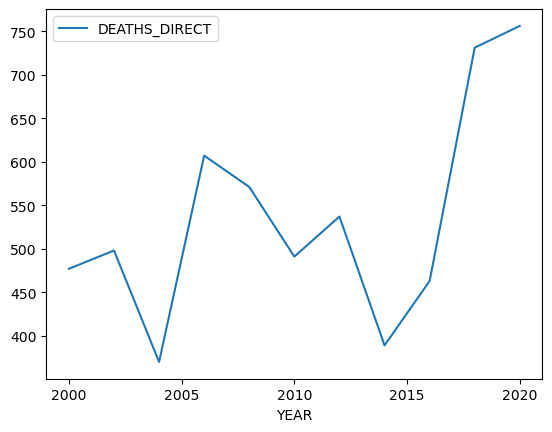

In [69]:
#summarize casualities by weather events over time
test_df = weather_deaths_df.groupby('YEAR')['DEATHS_DIRECT'].sum().reset_index()
ax = test_df.plot(x='YEAR', y='DEATHS_DIRECT')
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
plt.savefig("graph_outputs/weather_fatality_sum.png")

plt.show()

In [35]:
#analysis dataframes for trends using scatterplots, graphs etc
#create a new DF containing [one state from every geographic region of the US, year, weather event]
state_df = cleaned_total_df[['YEAR', 'EVENT_TYPE', 'EPISODE_ID', 'STATE']]
#count the number of weather events in a state (WA, CA, Louisiana, Missouri, Tennessee, Indiana) and graph them over time (scatter plot)
#grouped_df = df.groupby('Year')['Category'].nunique()

event_counts = state_df.groupby(['STATE', 'YEAR']).size().reset_index(name='Event Count')

# Create a scatter plot
ax = plt.scatter(event_counts['YEAR'], event_counts['EVENT_TYPE'], s=event_counts['Event Count']*100, alpha=0.5)
# Incorporate the other graph properties
plt.xlabel("Years")
plt.ylabel("# of Weather Events")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
ax.set_xticks([2000, 2005, 2010, 2015, 2020])

# Save the figure
plt.savefig("graph_outputs/wevents_statefreq.png")

# Show plot
plt.grid(True)
plt.show()

KeyError: 'EVENT_TYPE'